# 002 - Data Science with Python - Terry McCann 
## Clustering 

In this demo we are going to look at a basic clustering algorthm. 
Clustering is typicaly an unsupervised Machine Learning technique (refer back to the slides for a definition). 

In this demo, we will explore clustering with K-Means. We will use a series of modules:

**matplotlib** - This module will allow us to visualise the output of our model. We will want to examine the data in 2 dimensions, we could do more but that will do for now. Interested in more dimensions? Ask me about PCA.   
**sklearn** -sklearn is one of the most used modules for general machine learning. Shallow learning. We can talk more about deep learning another time.    
**pandas** - Pandas is used for its implementation on data frames.     
**numpy** - Statistical package for working with numbers.    

Ok. Lets begin by looking at importing those modules.

In [3]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
 
import pandas as pd
import numpy as np
 
# Only needed if you want to display your plots inline if using Notebook
%matplotlib inline

"What does the % mean?" Well that would be Magic. Configuration 

Next we will import some data. The most common dataset for clustering is the Iris Dataset. 
https://en.wikipedia.org/wiki/Iris_flower_data_set

It is a series of observations about different variations of Iris flower. 

In [4]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png")

In [5]:
iris = datasets.load_iris()

In [6]:
print(iris.data[0:10]) 

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


Lets take a look at the names of our features. 

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Store the inputs as a Pandas Dataframe and set the column names. 

We are limiting our prediction only to the sepal length and width. 

In [10]:
x1 = pd.DataFrame(iris.data)
x = x1.ix[:, 0:1]
x.columns = ['Sepal_Length','Sepal_Width']
 
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [11]:
print(x[0:10])
print(y[0:10])

   Sepal_Length  Sepal_Width
0           5.1          3.5
1           4.9          3.0
2           4.7          3.2
3           4.6          3.1
4           5.0          3.6
5           5.4          3.9
6           4.6          3.4
7           5.0          3.4
8           4.4          2.9
9           4.9          3.1
   Targets
0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0


Text(0.5, 1.0, 'Sepal')

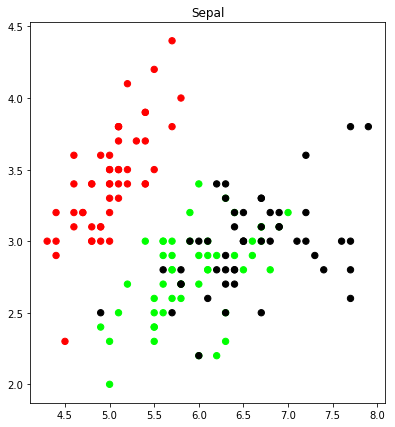

In [12]:
# Set the size of the plot
plt.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])
outcomes = iris.target_names[0:3]
colormatrix = np.column_stack((colormap, outcomes))

# Plot Sepal
plt.subplot(1, 2, 1)
plt.scatter(x.Sepal_Length, x.Sepal_Width, c=colormap[y.Targets], s=40)
plt.title('Sepal')
 


Lets check what that all means. 

In [13]:
print(colormatrix)

[['red' 'setosa']
 ['lime' 'versicolor']
 ['black' 'virginica']]


Let try to do the same thing but without our lables.

For that we will use a clustering algorthim called K-Means. K-means is an iterative model which optimises using gradirnt decent to select the most optimal centroid for a cluster, pretty much by averaging the data.   
K = number of cluster.   
Mean = the closest distance between two points.   




In [14]:
model = KMeans(n_clusters=3)

In [15]:
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [16]:
# This is what KMeans thought
model.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

Lets create a side-by-side comparisson of both our original and our predicted. 

Text(0.5, 1.0, 'K Mean Classification')

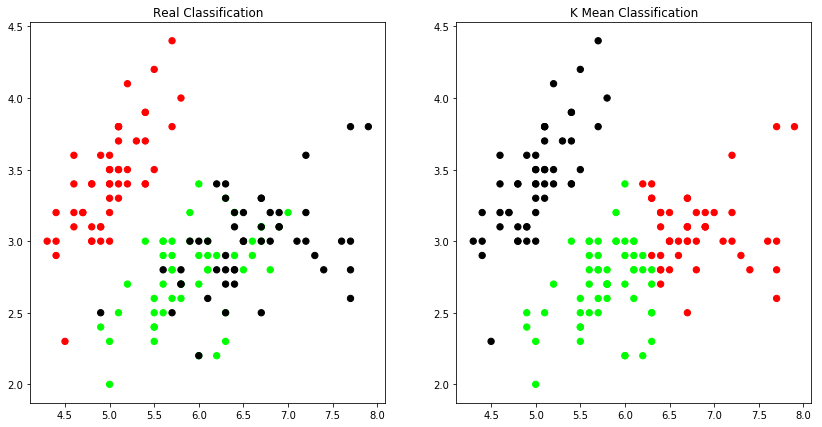

In [17]:
plt.figure(figsize=(14,7))
 
colormap = np.array(['red', 'lime', 'black'])
 
plt.subplot(1, 2, 1)
plt.scatter(x.Sepal_Length, x.Sepal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')

colormap = np.array(['lime', 'red', 'black'])

plt.subplot(1, 2, 2)
plt.scatter(x.Sepal_Length, x.Sepal_Width, c=colormap[model.labels_], s=40)
plt.title('K Mean Classification')